In [47]:
import pandas as pd
import hvplot.pandas
import holoviews as hv

front = "/Users/Jordandass/"

table_list = ["Desktop/FPL/All stats/fpl_prices_new.csv", 
"Desktop/FPL/All stats/fpl_points.csv", 
"Desktop/FPL/All stats/Player_possession.csv", 
"Desktop/FPL/All stats/Player_defense.csv",
"Desktop/FPL/All stats/Player_pass.csv",
"Desktop/FPL/All stats/Player_shot.csv"]

club_dict = {"Brentford":"BRE", "Chelsea": "CHE", "Man City": "MCI", "Norwich": "NOR", "Burnley": "BUR", "Spurs": "TOT", "Watford": "WAT", "Newcastle": "NEW", "Everton": "EVE", "Man Utd": "MUN", "Arsenal": "ARS", "Crystal Palace": "CRY", "Aston Villa": "AVL", "Brighton": "BHA", "Wolves": "WOL", "Liverpool": "LIV", "Leicester": "LEI", "Leeds": "LEE", "Southampton": "SOU", "West Ham": "WHU"}
min_games = 10
for num, table in enumerate(table_list):  
    if num == 0:
        df = pd.read_csv(f"{front}{table}")
        
        #df["team"] = [club_dict[club] for club in df["Club"]]
    elif num == 1:
        df = pd.read_csv(f"{front}{table}")
        
        df = df.sort_values(by = ["points_per_game", "cost"], ascending = [False, True])
        
        df_min = df[df["minutes"] >= 90 * min_games]
                
        df_min["points_per_min"] = df_min["total_points"]/df_min["minutes"]
        df_min["points_per_mil"] = df_min["total_points"]/df_min["cost"]
        
        gk_scatter = df_min[df_min["position"] == "GKP"].hvplot.scatter(x = "points_per_min", y = "points_per_mil", hover_cols = ["name", "team", "position", "cost", "minutes", "total_points"])
        gk_slope = hv.Slope.from_scatter(gk_scatter).opts(color = "yellow")
        
        def_scatter = df_min[df_min["position"] == "DEF"].hvplot.scatter(x = "points_per_min", y = "points_per_mil", hover_cols = ["name", "team", "position", "cost", "minutes", "total_points"])
        def_slope = hv.Slope.from_scatter(def_scatter).opts(color = "blue")
        
        mid_scatter = df_min[df_min["position"] == "MID"].hvplot.scatter(x = "points_per_min", y = "points_per_mil", hover_cols = ["name", "team", "position", "cost", "minutes", "total_points"])
        mid_slope = hv.Slope.from_scatter(mid_scatter).opts(color = "green")
        
        fwd_scatter = df_min[df_min["position"] == "FWD"].hvplot.scatter(x = "points_per_min", y = "points_per_mil", hover_cols = ["name", "team", "position", "cost", "minutes", "total_points"])
        fwd_slope = hv.Slope.from_scatter(fwd_scatter).opts(color = "red")
        
        full_scatter = df_min.hvplot.scatter(x = "points_per_min", y = "points_per_mil", by = "position", hover_cols = ["name", "team", "position", "cost", "minutes", "total_points"])
        #display(full_scatter * gk_slope * def_slope * mid_slope * fwd_slope)


def get_scatter(min_games, multiple_position, position_chosen, max_price = 100):
    df = pd.read_csv("/Users/Jordandass/Desktop/FPL/All stats/fpl_points.csv")
    
    df_min = df[df["minutes"] >= 90 * min_games]
    df_min = df_min[df_min["position"].isin(position_chosen)]
    
    df_min = df_min[df_min["cost"] <= max_price]
    
    df_min["points_per_min"] = df_min["total_points"]/df_min["minutes"]
    df_min["points_per_mil"] = df_min["total_points"]/df_min["cost"]
    
    df_min.dropna(inplace=True)
    
    check_dict = {}
    if multiple_position == 'True':
        if "GKP" in position_chosen:
            df = df_min[df_min["position"] == "GKP"]
            if len(df) == 0:
                check_dict["GKP"] = False
            else:
                check_dict["GKP"] = True
                gkp_scatter = df_min[df_min["position"] == "GKP"].hvplot.scatter(x = "points_per_min", y = "points_per_mil", hover_cols = ["name", "team", "position", "cost", "minutes", "total_points"])
                gkp_slope = hv.Slope.from_scatter(gk_scatter).opts(color = "yellow")
        
        if "def" in position_chosen:
            df = df_min[df_min["position"] == "DEF"]
            if len(df) == 0:
                check_dict["DEF"] = False
            else:
                check_dict["DEF"] = True
                def_scatter = df_min[df_min["position"] == "DEF"].hvplot.scatter(x = "points_per_min", y = "points_per_mil", hover_cols = ["name", "team", "position", "cost", "minutes", "total_points"])
                def_slope = hv.Slope.from_scatter(def_scatter).opts(color = "blue")
        
        if "MID" in position_chosen:
            df = df_min[df_min["position"] == "MID"]
            if len(df) == 0:
                check_dict["MID"] = False
            else:
                check_dict["MID"] = True
                mid_scatter = df_min[df_min["position"] == "MID"].hvplot.scatter(x = "points_per_min", y = "points_per_mil", hover_cols = ["name", "team", "position", "cost", "minutes", "total_points"])
                mid_slope = hv.Slope.from_scatter(mid_scatter).opts(color = "green")
        
        if "FWD" in position_chosen:
            df = df_min[df_min["position"] == "FWD"]
            if len(df) == 0:
                check_dict["FWD"] = False
            else:
                check_dict["FWD"] = True
                fwd_scatter = df_min[df_min["position"] == "FWD"].hvplot.scatter(x = "points_per_min", y = "points_per_mil", hover_cols = ["name", "team", "position", "cost", "minutes", "total_points"])
                fwd_slope = hv.Slope.from_scatter(fwd_scatter).opts(color = "red")
        
        full_scatter = df_min.hvplot.scatter(x = "points_per_min", y = "points_per_mil", by = "position", hover_cols = ["name", "team", "position", "cost", "minutes", "total_points"])
        
        list_to_eval = ["full_scatter"]
        for position in position_chosen:
            if check_dict[position] == True:
                list_to_eval.append(f"{position.lower()}_slope")
            
        return eval("*".join(list_to_eval))
    
    else:
        scatter = df_min.hvplot.scatter(x = "points_per_min", y = "points_per_mil", hover_cols = ["name", "team", "position", "cost", "minutes", "total_points"])
        full_scatter = df_min.hvplot.scatter(x = "points_per_min", y = "points_per_mil", by = "position", hover_cols = ["name", "team", "position", "cost", "minutes", "total_points"])
        
        return full_scatter * hv.Slope.from_scatter(scatter), df_min
    
# 38 games in a season
scatter, df = get_scatter(min_games = 25, multiple_position = 'False', position_chosen = ["GKP", "DEF", "MID", "FWD"])

df.to_csv("All_FPL_players_2022.csv")

points_per_mil = df.sort_values(by = ["points_per_mil"], ascending = False)
df1 = points_per_mil.head(20)

points_per_min = df.sort_values(by = ["points_per_min"], ascending = False)
df2 = points_per_min.head(20)

df_comb = pd.concat([df1, df2], axis = "index").drop_duplicates()

df_comb.to_csv("df_comb.csv")

/var/folders/16/t083_7x94m532lfsy9y_0dfw0000gn/T/ipykernel_872/1135037673.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min["points_per_min"] = df_min["total_points"]/df_min["minutes"]
/var/folders/16/t083_7x94m532lfsy9y_0dfw0000gn/T/ipykernel_872/1135037673.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min["points_per_mil"] = df_min["total_points"]/df_min["cost"]


In [54]:
import pandas as pd
from collections import defaultdict
from collections import Counter
from itertools import combinations
import unidecode


# Provide player last name and team abbreviation
def player_desired(player_array):
    df = pd.read_csv("All_FPL_players_2022.csv")
    
    df["name_clean"] = [unidecode.unidecode(player) for player in df["name"]]
    
    player_desired_array = []
    for player_list in player_array:
        name = player_list[0]
        team = player_list[1]

        player_chosen = df[(df["name_clean"] == name) & (df["team"] == team)]

        if len(player_chosen) == 1:
            position = player_chosen["position"].values[0]
            team = player_chosen["team"].values[0]
            name = player_chosen["name"].values[0]
            cost = player_chosen["cost"].values[0]

            player_desired_array.append([name, team, position, cost])

        else:
            return "problemo"
        
    return player_desired_array

def combination_generator(gkp_slot, def_slot, mid_slot, fwd_slot, player_desired_array):
    df_comb = pd.read_csv("df_comb.csv")
    
    df = pd.read_csv("All_FPL_players_2022.csv")
    df["name_clean"] = [unidecode.unidecode(player) for player in df["name"]]
    
    GKP = df_comb[df_comb["position"] == "GKP"]
    DEF = df_comb[df_comb["position"] == "DEF"]
    MID = df_comb[df_comb["position"] == "MID"]
    FWD = df_comb[df_comb["position"] == "FWD"]
    
    #formation chosen
    full_gkp_slot, full_def_slot, full_mid_slot, full_fwd_slot = 2, 5, 5, 2
    
    pos_dict = {"GKP": gkp_slot, "DEF": def_slot, "MID": mid_slot, "FWD": fwd_slot}
    table_dict = {"GKP": GKP, "DEF": DEF, "MID": MID, "FWD": FWD}
    
    player_df_list = []
    for player_list in player_desired_array:
        name, team, position, cost = player_list
        
        # Add player to position slot filled
        pos_dict[position] -= 1
        player_chosen = df[(df["name_clean"] == name) & (df["team"] == team) & (df["cost"] == cost) & (df["position"] == position)]
        player_df_list.append(player_chosen)
        
    df_player_chosen = pd.concat(player_df_list, axis = "index")
    display(df_player_chosen)
    
    GKP = GKP[~GKP["name"].isin(df_player_chosen[df_player_chosen["position"] == "GKP"]["name"])]
    DEF = DEF[~DEF["name"].isin(df_player_chosen[df_player_chosen["position"] == "DEF"]["name"])]
    MID = MID[~MID["name"].isin(df_player_chosen[df_player_chosen["position"] == "MID"]["name"])]
    FWD = FWD[~FWD["name"].isin(df_player_chosen[df_player_chosen["position"] == "FWD"]["name"])]
    
    for num, table in enumerate([GKP, DEF, MID, FWD]):
        if num == 0:
            gkp_comb = combinations(list(table["name"]), gkp_slot) 

        elif num == 1:
            def_comb = combinations(list(table["name"]), def_slot) 

        elif num == 2:
            mid_comb = combinations(list(table["name"]), mid_slot) 

        elif num == 3:
            fwd_comb = combinations(list(table["name"]), fwd_slot) 
            
    for num, comb_list in enumerate([gkp_comb, def_comb, mid_comb, fwd_comb]):
        if num == 0:
            gkp_comb_new = []
            gkp_chosen = df_player_chosen[df_player_chosen["position"] == "GKP"]["name"]
            for comb in comb_list:
                gkp_comb_new.append(comb + tuple(gkp_chosen))
                
            gkp_comb = gkp_comb_new
                
        if num == 1:
            def_comb_new = []
            def_chosen = df_player_chosen[df_player_chosen["position"] == "DEF"]["name"]
            for comb in comb_list:
                def_comb_new.append(comb + tuple(def_chosen))
                
            def_comb = def_comb_new
                
        if num == 2:
            mid_comb_new = []
            mid_chosen = df_player_chosen[df_player_chosen["position"] == "MID"]["name"]
            for comb in comb_list:
                mid_comb_new.append(comb + tuple(mid_chosen))
                
            mid_comb = mid_comb_new
                
        if num == 3:
            fwd_comb_new = []
            fwd_chosen = df_player_chosen[df_player_chosen["position"] == "FWD"]["name"]
            for comb in comb_list:
                fwd_comb_new.append(comb + tuple(fwd_chosen))
                
            fwd_comb = fwd_comb_new
        
    comb_dict = {"GKP": gkp_comb, "DEF": def_comb, "MID": mid_comb, "FWD": fwd_comb}
    for player_list in player_desired_array:
        name, team, position, cost = player_list
        

    import itertools
    a = [list(gkp_comb), list(def_comb), list(mid_comb), list(fwd_comb)]
    team_comb = list(itertools.product(*a))
    
    return team_comb

def money_available_formulater(gkp_slot, def_slot, mid_slot, fwd_slot, player_desired_array):
    # Player desired array comes in this form:
    # [['Salah', 'LIV', 'MID', 13.0], ['Alexander-Arnold', 'LIV', 'DEF', 7.5]]
    full_gkp_slot, full_def_slot, full_mid_slot, full_fwd_slot = 2, 5, 5, 2
    
    df_comb = pd.read_csv("df_comb.csv")
    
    money_available = 100
    thrown_money = 0
    
    df = pd.read_csv("All_FPL_players_2022.csv")
    
    GKP_all = df[df["position"] == "GKP"].sort_values(by = ["cost"], ascending = True)
    DEF_all = df[df["position"] == "DEF"].sort_values(by = ["cost"], ascending = True)
    MID_all = df[df["position"] == "MID"].sort_values(by = ["cost"], ascending = True)
    FWD_all = df[df["position"] == "FWD"].sort_values(by = ["cost"], ascending = True)
    
    pos_dict = {"GKP": gkp_slot, "DEF": def_slot, "MID": mid_slot, "FWD": fwd_slot}
    
    for player_list in player_desired_array:
        name, team, position, cost = player_list
        
        # Add player to position slot filled
        pos_dict[position] += 1
        
        # Deduct player cost from disposable income
        money_available -= cost
        
    for num, remainder in enumerate([full_gkp_slot - gkp_slot, full_def_slot - def_slot, full_mid_slot - mid_slot, full_fwd_slot - fwd_slot]):
        if num == 0:
            money_available -= sum(list(GKP_all["cost"])[:remainder])
            thrown_money += sum(list(GKP_all["cost"])[:remainder])

        elif num == 1:
            money_available -= sum(list(DEF_all["cost"])[:remainder])
            thrown_money += sum(list(DEF_all["cost"])[:remainder])

        elif num == 2:
            money_available -= sum(list(MID_all["cost"])[:remainder])
            thrown_money += sum(list(MID_all["cost"])[:remainder])

        elif num == 3:
            money_available -= sum(list(FWD_all["cost"])[:remainder])
            thrown_money += sum(list(FWD_all["cost"])[:remainder])
            
    return money_available, thrown_money

#player_desired(player_array)
#money_available_formulater(df_comb, gkp_slot, def_slot, mid_slot, fwd_slot, player_desired_array)

    
player_desired_list = player_desired([["Alexander-Arnold", "LIV"], ["Salah", "LIV"]])
money_available, thrown_money = money_available_formulater(gkp_slot = 1, def_slot = 5, mid_slot = 4, fwd_slot = 1, player_desired_array = player_desired_list)
team_comb = combination_generator(gkp_slot = 1, def_slot = 5, mid_slot = 4, fwd_slot = 1, player_desired_array = player_desired_list)


Unnamed: 0  Unnamed: 0.1              name team position  cost     status  \
65         293           293  Alexander-Arnold  LIV      DEF   7.5  Available   
63         291           291             Salah  LIV      MID  13.0  Available   

    minutes  total_points  bonus  points_per_game  selected_by_percent  \
65     2853           208     32              6.5                 55.7   
63     2758           265     29              7.6                 58.9   

    points_per_min  points_per_mil        name_clean  
65        0.072906       27.733333  Alexander-Arnold  
63        0.096084       20.384615             Salah

In [55]:
money_available

64.0

In [56]:
name_array = []
for team in team_comb:
    name_list = []
    for pos in team:
        name_list += list(pos)
        
    name_array.append(name_list)
    
from collections import defaultdict
from collections import Counter

team_dict = {}
for num, name_list in enumerate(name_array):
    team_df = df[df["name"].isin(name_list)]
    team_dict[num] = [sum(list(team_df["cost"])), sum(list(team_df["total_points"])), Counter(list(team_df["team"]))]
    
total_points_benchmark = 0
for chosen_team_dict in team_dict:
    total_cost = team_dict[chosen_team_dict][0]
    
    teams_spread = team_dict[chosen_team_dict][2]
    largest_team_count = max(list(teams_spread.values()))
    
    if total_cost <= money_available and largest_team_count <= 3:
        total_points = team_dict[chosen_team_dict][1]
        if total_points > total_points_benchmark:
            
            team_dict[chosen_team_dict]
            best_list = name_array[chosen_team_dict]

            best_team_df = df[df["name"].isin(best_list)]

            total_points_benchmark = total_points
            best_team = chosen_team_dict

print(team_dict[best_team][1])

for team in team_dict:
    if team_dict[team][1] >= team_dict[best_team][1]:
        
        total_cost = team_dict[team][0]
    
        teams_spread = team_dict[team][2]
        largest_team_count = max(list(teams_spread.values()))

        if total_cost <= money_available and largest_team_count <= 3:
            total_points = team_dict[team][1]

            team_dict[team]
            best_list = name_array[team]

            best_team_df = df[df["name"].isin(best_list)]
            
            print(team_dict[team][0])
            print(team_dict[team][1])
            print(team_dict[team][2])
            
            display(best_team_df)

2267


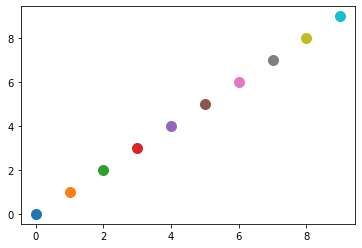

In [58]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()


points_with_annotation = []
for i in range(10):
    point, = plt.plot(i, i, 'o', markersize=10)

    annotation = ax.annotate("Mouseover point %s" % i,
        xy=(i, i), xycoords='data',
        xytext=(i + 1, i), textcoords='data',
        horizontalalignment="left",
        arrowprops=dict(arrowstyle="simple",
                        connectionstyle="arc3,rad=-0.2"),
        bbox=dict(boxstyle="round", facecolor="w", 
                  edgecolor="0.5", alpha=0.9)
        )
    # by default, disable the annotation visibility
    annotation.set_visible(False)

    points_with_annotation.append([point, annotation])


def on_move(event):
    visibility_changed = False
    for point, annotation in points_with_annotation:
        should_be_visible = (point.contains(event)[0] == True)

        if should_be_visible != annotation.get_visible():
            visibility_changed = True
            annotation.set_visible(should_be_visible)

    if visibility_changed:        
        plt.draw()

on_move_id = fig.canvas.mpl_connect('motion_notify_event', on_move)

plt.show()